## Student Performance Indicator

### Problem statement
- Understand how the students performance (test scores) is affected by variables such as gender, parental level of education and preparation courses.

### Dataset Source

-  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
#First 5 rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Dataset shape
df.shape

(1000, 8)

**Data dictionary**


- gender: sex of students (Male/female) 
<br>
- race/ethnicity: ethnicity of students (Group A, B,C, D,E)
<br>
- parental level of education: parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
<br>
- lunch: having lunch before test (standard or free/reduced)
<br>
- test preparation course: complete or not complete before test
<br>
- math score
<br>
- reading score
<br>
- writing score

### Data checks to perfom:

- Missing values
- Duplicates
- Data type
- Number of unique values
- Statistics
- Categorical columns

### Missing values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values**

### Duplicates

In [4]:
df.duplicated().sum()

0

**There are no duplicate values**

### Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Unique Values

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Statistics

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insigths:
- All mean values are very close 
- Reading and writing test minimums are greater than math.

### Exploring Data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Categories

In [21]:
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique())
print(' ')
print("Categories in 'race_ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique())
print(' ')
print("Categories in 'parental_level_of_education' variable: ", end="")
print(df['parental_level_of_education'].unique())
print(' ')
print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique())
print(' ')
print("Categories in 'test_preparation_course' variable: ", end="")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
 
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
 
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
Categories in 'lunch' variable: ['standard' 'free/reduced']
 
Categories in 'test_preparation_course' variable: ['none' 'completed']


#### Numerical and categorical columns

In [31]:
# lists with the numerical and categorical features
numerical_feats = [feat for feat in df.columns if df[feat].dtype != 'O']
categorical_feats = [feat for feat in df.columns if df[feat].dtype == 'O']

# printig
print("We have {} numerical fetures in the dataset: {}".format(len(numerical_feats),numerical_feats))
print('')
print("We have {} categorical fetures in the dataset: {}".format(len(categorical_feats),categorical_feats))

We have 3 numerical fetures in the dataset: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical fetures in the dataset: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding new columns

In [32]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Data Visualization

#### Gender Column

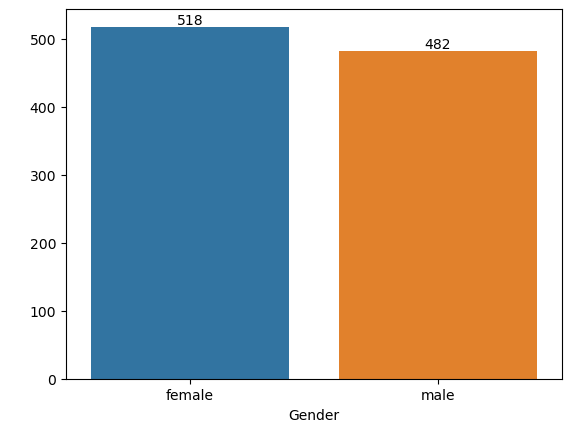

In [49]:
ax = sns.countplot(data=df, x='gender')
ax.bar_label(ax.containers[0])
plt.xlabel('Gender')
plt.ylabel(' ')
plt.show()


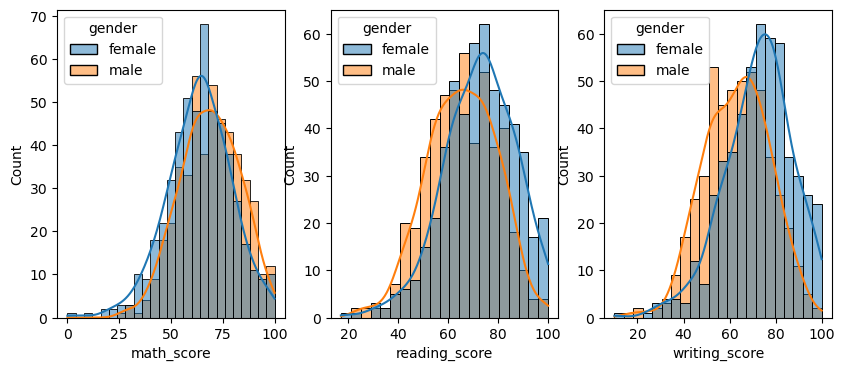

In [55]:
plt.subplots(1,3, figsize=(10,4))
plt.subplot(131)
sns.histplot(data=df, x='math_score', kde=True, hue='gender')
plt.subplot(132)
sns.histplot(data=df, x='reading_score', kde=True, hue='gender')
plt.subplot(133)
sns.histplot(data=df, x='writing_score', kde=True, hue='gender')
plt.show()

In [85]:
from scipy import stats

In [92]:
# shapiro test (normality)
X = df.loc[df['gender']=='male','math_score']
res = stats.shapiro(X.values)
res.statistic

0.9935628175735474

In [99]:
# levene test (equal variances)
# equal variances: a small res.statistic
f_math = df.loc[df['gender']=='female','writing_score']
m_math = df.loc[df['gender']=='male','writing_score']

res = stats.levene(f_math,m_math)
res.statistic

0.006939404299938817

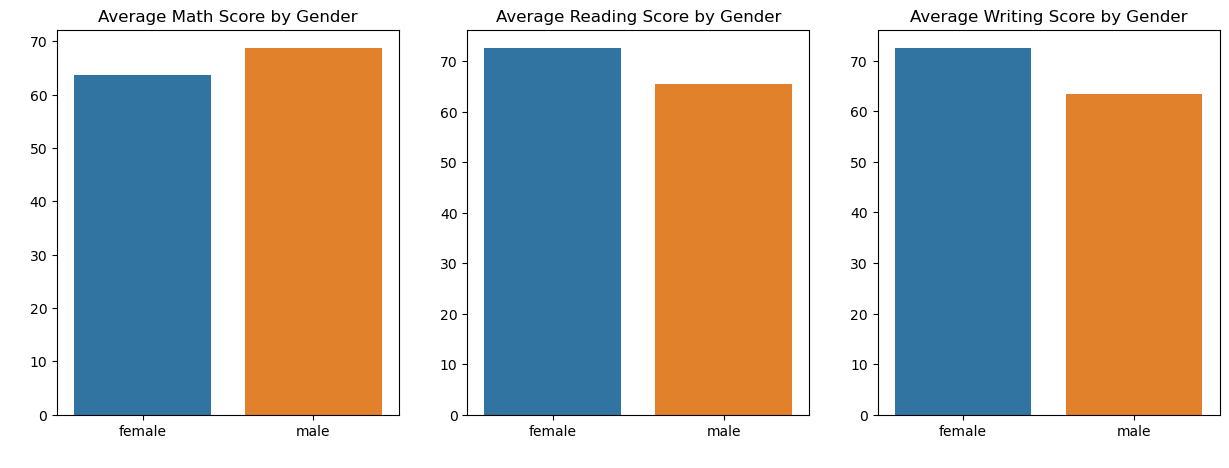

In [76]:
df_gender = df.groupby('gender', as_index=False)['math_score','reading_score','writing_score']\
              .agg('mean',['math_score','reading_score','writing_score'])

plt.subplots(1,3, figsize=(15,5))

plt.subplot(131)
sns.barplot(data=df_gender, x='gender', y='math_score')\
   .set(title='Average Math Score by Gender')
plt.ylabel(' ')
plt.xlabel(' ')

plt.subplot(132)
sns.barplot(data=df_gender, x='gender', y='reading_score')\
   .set(title='Average Reading Score by Gender')
plt.ylabel(' ')
plt.xlabel(' ')

plt.subplot(133)
sns.barplot(data=df_gender, x='gender', y='writing_score')\
   .set(title='Average Writing Score by Gender')
plt.ylabel(' ')
plt.xlabel(' ')
plt.show()

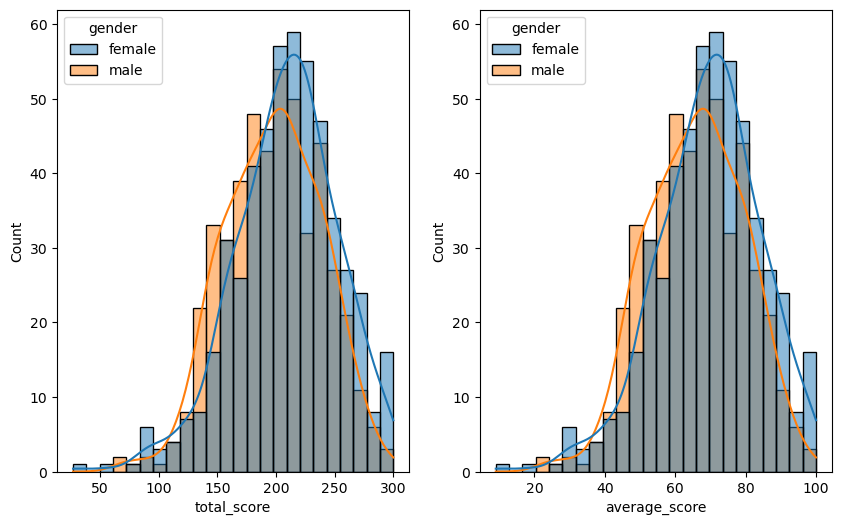

In [78]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

#### Race/ethnicity Column

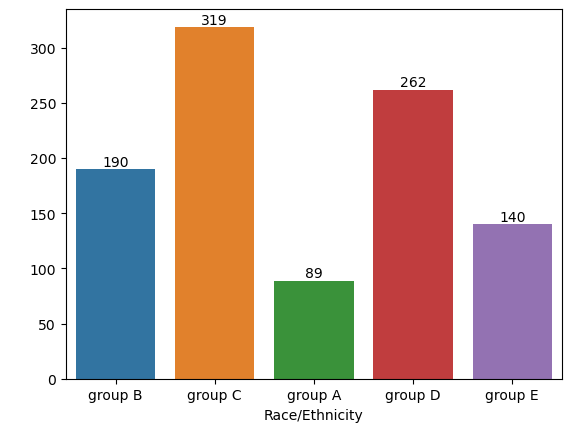

In [80]:
ax = sns.countplot(data=df, x='race_ethnicity')
ax.bar_label(ax.containers[0])
plt.xlabel('Race/Ethnicity')
plt.ylabel(' ')
plt.show()

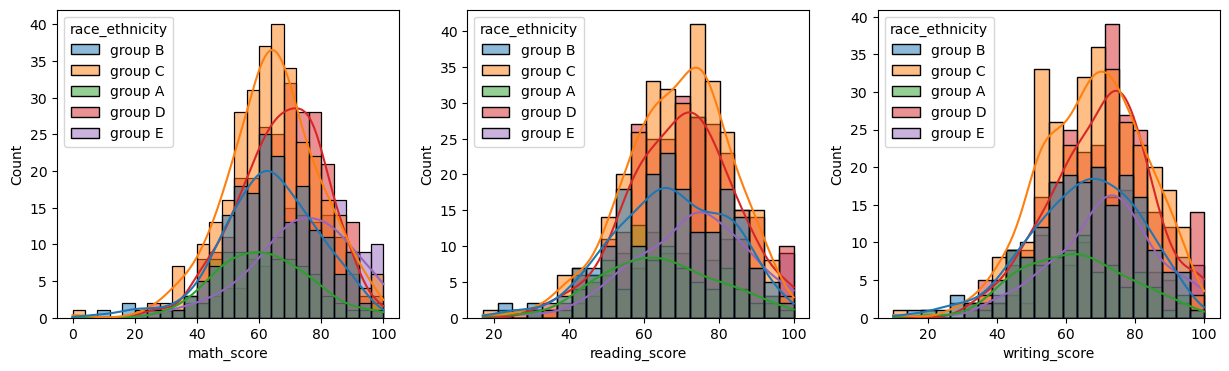

In [82]:
plt.subplots(1,3, figsize=(15,4))
plt.subplot(131)
sns.histplot(data=df, x='math_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df, x='reading_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df, x='writing_score', kde=True, hue='race_ethnicity')
plt.show()

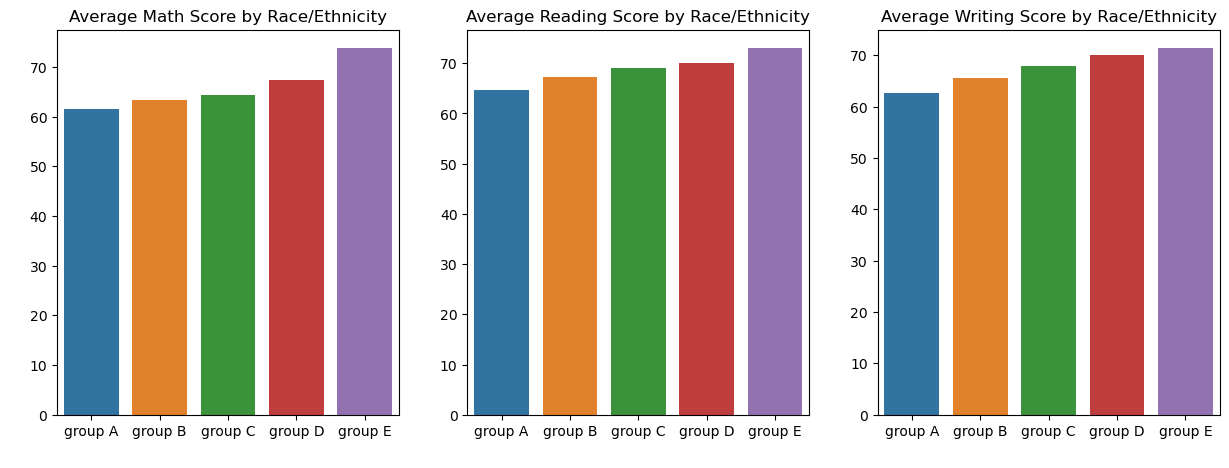

In [83]:
df_gender = df.groupby('race_ethnicity', as_index=False)['math_score','reading_score','writing_score']\
              .agg('mean',['math_score','reading_score','writing_score'])

plt.subplots(1,3, figsize=(15,5))

plt.subplot(131)
sns.barplot(data=df_gender, x='race_ethnicity', y='math_score')\
   .set(title='Average Math Score by Race/Ethnicity')
plt.ylabel(' ')
plt.xlabel(' ')

plt.subplot(132)
sns.barplot(data=df_gender, x='race_ethnicity', y='reading_score')\
   .set(title='Average Reading Score by Race/Ethnicity')
plt.ylabel(' ')
plt.xlabel(' ')

plt.subplot(133)
sns.barplot(data=df_gender, x='race_ethnicity', y='writing_score')\
   .set(title='Average Writing Score by Race/Ethnicity')
plt.ylabel(' ')
plt.xlabel(' ')
plt.show()